In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import cv2

import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import optimizers
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

In [44]:
## Fungsi untuk Mengekstraksi Label dari Nama File
def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    subject_id, etc = filename.split('__')

    # Mengambil bagian yang relevan dari nama file
    parts = etc.split('_')
    
    # Verifikasi jumlah elemen dan format
    if len(parts) < 3:
        raise ValueError(f"Filename format incorrect. Expected at least 4 parts, got {len(parts)} in file {filename}")
    
    # Mengambil elemen-elemen dari nama file
    finger = parts[2]

    # Mapping untuk jari
    finger_labels = {
        'thumb': '0',
        'index': '1',
        'middle': '2',
        'ring': '3',
        'little': '4'
    }

    # Mengembalikan label dalam format yang sesuai
    if finger not in finger_labels:
        raise ValueError(f"Unknown finger type: {finger}")

    return np.array([finger_labels[finger]], dtype=np.uint16)

In [45]:
## Memuat dan Memproses Data Gambar
img_size = 96

def loading_data(path):
    data = []
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resize = cv2.resize(img_array, (img_size, img_size))
        try:
            label = extract_label(os.path.join(path, img))
            data.append([label[0], img_resize])
        except ValueError as e:
            print(f"Skipping file due to error: {e}")
        if len(data) % 1000 == 0:
            print(len(data))
    return data

In [46]:
Easy = "SOCOFing/Altered/Altered-Easy" 
Medium = "SOCOFing/Altered/Altered-Medium"
Hard= "SOCOFing/Altered/Altered-Hard"
Real = "SOCOFing/Real"

In [47]:
# Memuat Semua Data dari Berbagai Jalur
def load_all_data():
    data = []
    for path in [Easy, Medium, Hard]:
        path_data = loading_data(path)
        data.extend(path_data)
    return data

# Memuat dan Memproses Data untuk Pelatihan
all_data = load_all_data()
img, labels = [], []
for label, feature in all_data:
    labels.append(label)
    img.append(feature)

train_data = np.array(img).reshape(-1, img_size * img_size)  # Flatten the images
train_data = train_data / 255.0
train_labels = to_categorical(labels, num_classes=5)
labels = np.array(labels)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


In [48]:
## Membangun Model MLP untuk Klasifikasi Sidik Jari
#Activation function relu, sigmoid, tanh

model = Sequential([
    Flatten(input_shape=[img_size * img_size]),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dense(32, activation='relu', kernel_initializer='he_uniform'),
    Dense(5, activation='softmax') #jangan dirubah
])
model.summary()

/Users/bayusetia/Downloads/MLP_JST/env/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,190,277 (4.54 MB)

 Trainable params: 1,190,277 (4.54 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Hitung total jumlah sampel
num_samples = len(train_data) 

batch_size = 56

steps_per_epoch = num_samples // batch_size

## Kompilasi dan Pelatihan Model
## Optimizer yang dipakai Adam, SGD,RMSprop ##
## Learning rate 0.0001, 0.001, 0.01, 0.1, 0.5 ##
## Epoch 25, 50, 75, 100, 125 ##

model.compile(optimizer=optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=100, validation_split=0.2)

## Jangan lupa dirubah namanya tiap train nanti model sebelumnya ketimpa ##
model.save("BestModel/FingerprintPredict.h5")

Epoch 1/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4133 - loss: 1.5243 - val_accuracy: 0.4710 - val_loss: 1.2788
Epoch 2/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5339 - loss: 1.1442 - val_accuracy: 0.5385 - val_loss: 1.1351
Epoch 3/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6046 - loss: 0.9879 - val_accuracy: 0.6056 - val_loss: 0.9537
Epoch 4/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6692 - loss: 0.8398 - val_accuracy: 0.6069 - val_loss: 0.9925
Epoch 5/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7124 - loss: 0.7366 - val_accuracy: 0.7391 - val_loss: 0.6759
Epoch 6/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7636 - loss: 0.6197 - val_accuracy: 0.7604 - val_loss: 0.6284
Epoch 7/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8084 - loss: 0.4962 - val_accuracy: 0.7614 - val_loss: 0.6329
Epoch 8/100
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8322 - loss: 

In [50]:
## Memuat dan Menguji Model
test_data = loading_data(Real)

x_test, y_test = [], []
for label, feature in test_data:
    y_test.append(label)
    x_test.append(feature)

x_test = np.array(x_test).reshape(-1, img_size * img_size)  # Flatten the test images
y_test = to_categorical(np.array(y_test), num_classes=5)

## Evaluasi Model dan Menampilkan Hasil
# Prediksi pada Data Uji
preds = model.predict(x_test)
preds = np.argmax(preds, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(np.argmax(y_test, axis=1), preds)

1000
2000
3000
4000
5000
6000
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [51]:
# Menghitung metrik evaluasi lainnya
precision = precision_score(np.argmax(y_test, axis=1), preds, average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), preds, average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), preds, average='weighted')

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(np.argmax(y_test, axis=1), preds)

# Menampilkan hasil #

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Test Accuracy: 0.9527
Precision: 0.9602
Recall: 0.9527
F1 Score: 0.9523
Mean Squared Error (MSE): 0.0768


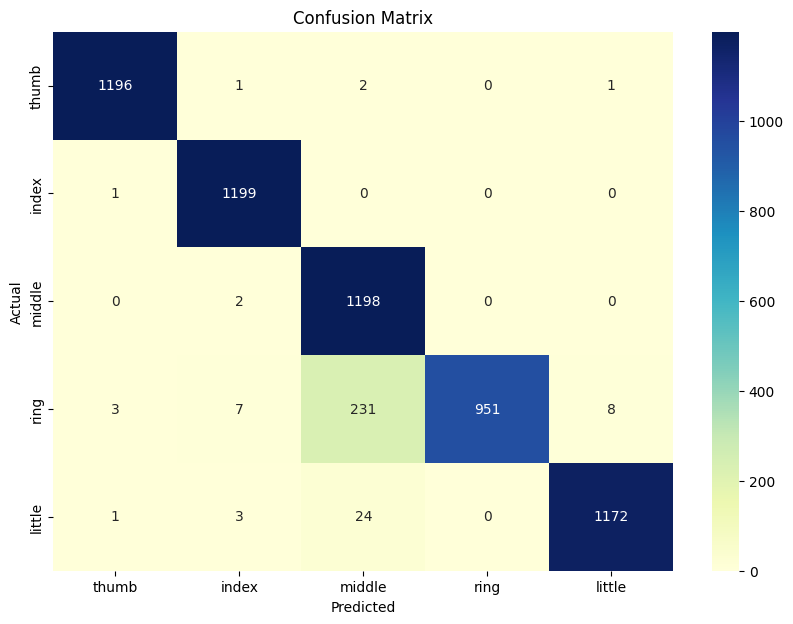

Test Accuracy: 0.9527
True:  4
Predicted:  4


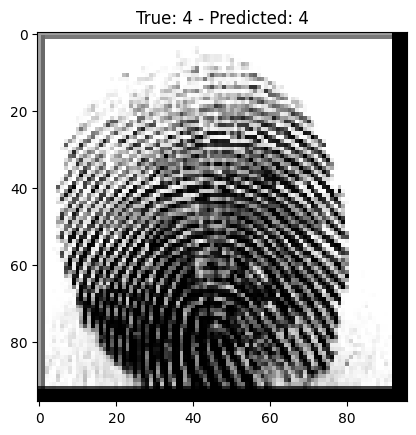

True:  4
Predicted:  4


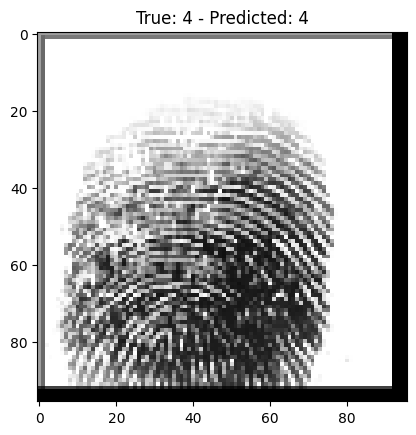

True:  0
Predicted:  0


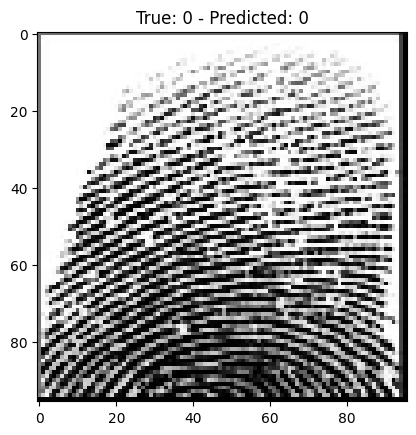

True:  4
Predicted:  4


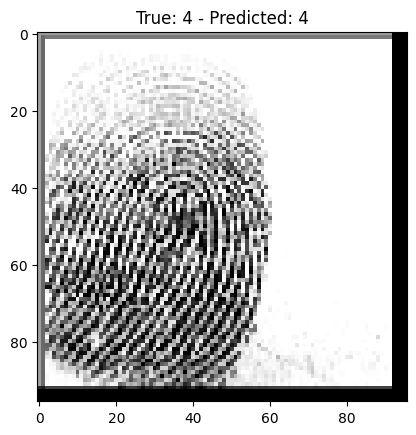

True:  2
Predicted:  2


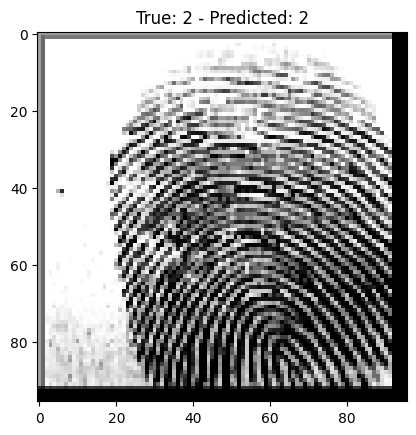

In [52]:
# Menampilkan Confusion Matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), preds)
df_cm = pd.DataFrame(cm, index=['thumb', 'index', 'middle', 'ring', 'little'], columns=['thumb', 'index', 'middle', 'ring', 'little'])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.savefig("confusion_matrix.jpg")
plt.show()

# Accuracy Score
accuracy = accuracy_score(np.argmax(y_test, axis=1), preds)
print(f"Test Accuracy: {accuracy:.4f}")


# Menampilkan Hasil Prediksi pada Beberapa Sampel
for i in range(5):
    print('True: ', np.argmax(y_test[i]))
    print('Predicted: ', preds[i])
    plt.imshow(x_test[i].reshape(img_size, img_size), cmap='gray')
    plt.title(f'True: {np.argmax(y_test[i])} - Predicted: {preds[i]}')
    plt.savefig(f"result-{i}.jpg")
    plt.show()


In [2]:
import tkinter as tk
from tkinter import filedialog, Label, Button
from PIL import Image, ImageTk
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("BestModel/FingerprintPredict.h5")

# Define label mapping
finger_labels = {
    0: 'thumb',
    1: 'index',
    2: 'middle',
    3: 'ring',
    4: 'little'
}

# Define the image size used for the model
img_size = 96

def predict_image(image_path):
    # Load and preprocess the image
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resize = cv2.resize(img_array, (img_size, img_size))
    img_array = img_resize.reshape(1, -1) / 255.0  # Flatten image
    
    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    prediction_percentage = np.max(prediction) * 100
    return finger_labels[predicted_class], prediction_percentage


def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Display the selected image
        img = Image.open(file_path).resize((250, 250))
        img_tk = ImageTk.PhotoImage(img)
        img_label.config(image=img_tk)
        img_label.image = img_tk
        
        # Predict and display the result
        result, percentage = predict_image(file_path)
        result_label.config(text=f"Prediction: {result} ({percentage:.2f}%)")

# Create main application window
app = tk.Tk()
app.title("Fingerprint Classifier")

# Create widgets
upload_btn = Button(app, text="Upload Image", command=load_image)
upload_btn.pack(pady=20)

img_label = Label(app)
img_label.pack(pady=10)

result_label = Label(app, text="Prediction: ")
result_label.pack(pady=10)

# Run the application
app.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
